<a href="https://colab.research.google.com/github/dornercr/INFO371/blob/main/INFO371_Week10_banking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   age        income  credit_score  avg_monthly_spend  num_transactions  \
0   56  52795.819106    589.034978        1460.454849                21   
1   69  57709.344606    725.730276        2419.183590                24   
2   46  69472.158735    571.255875        1974.471273                27   
3   32  39027.532707    781.607126        1602.855252                25   
4   60  56630.676994    591.793655        2061.559016                16   

   savings_balance  
0      3212.985201  
1      8686.083055  
2     16353.155303  
3      6463.473298  
4      5283.084753  


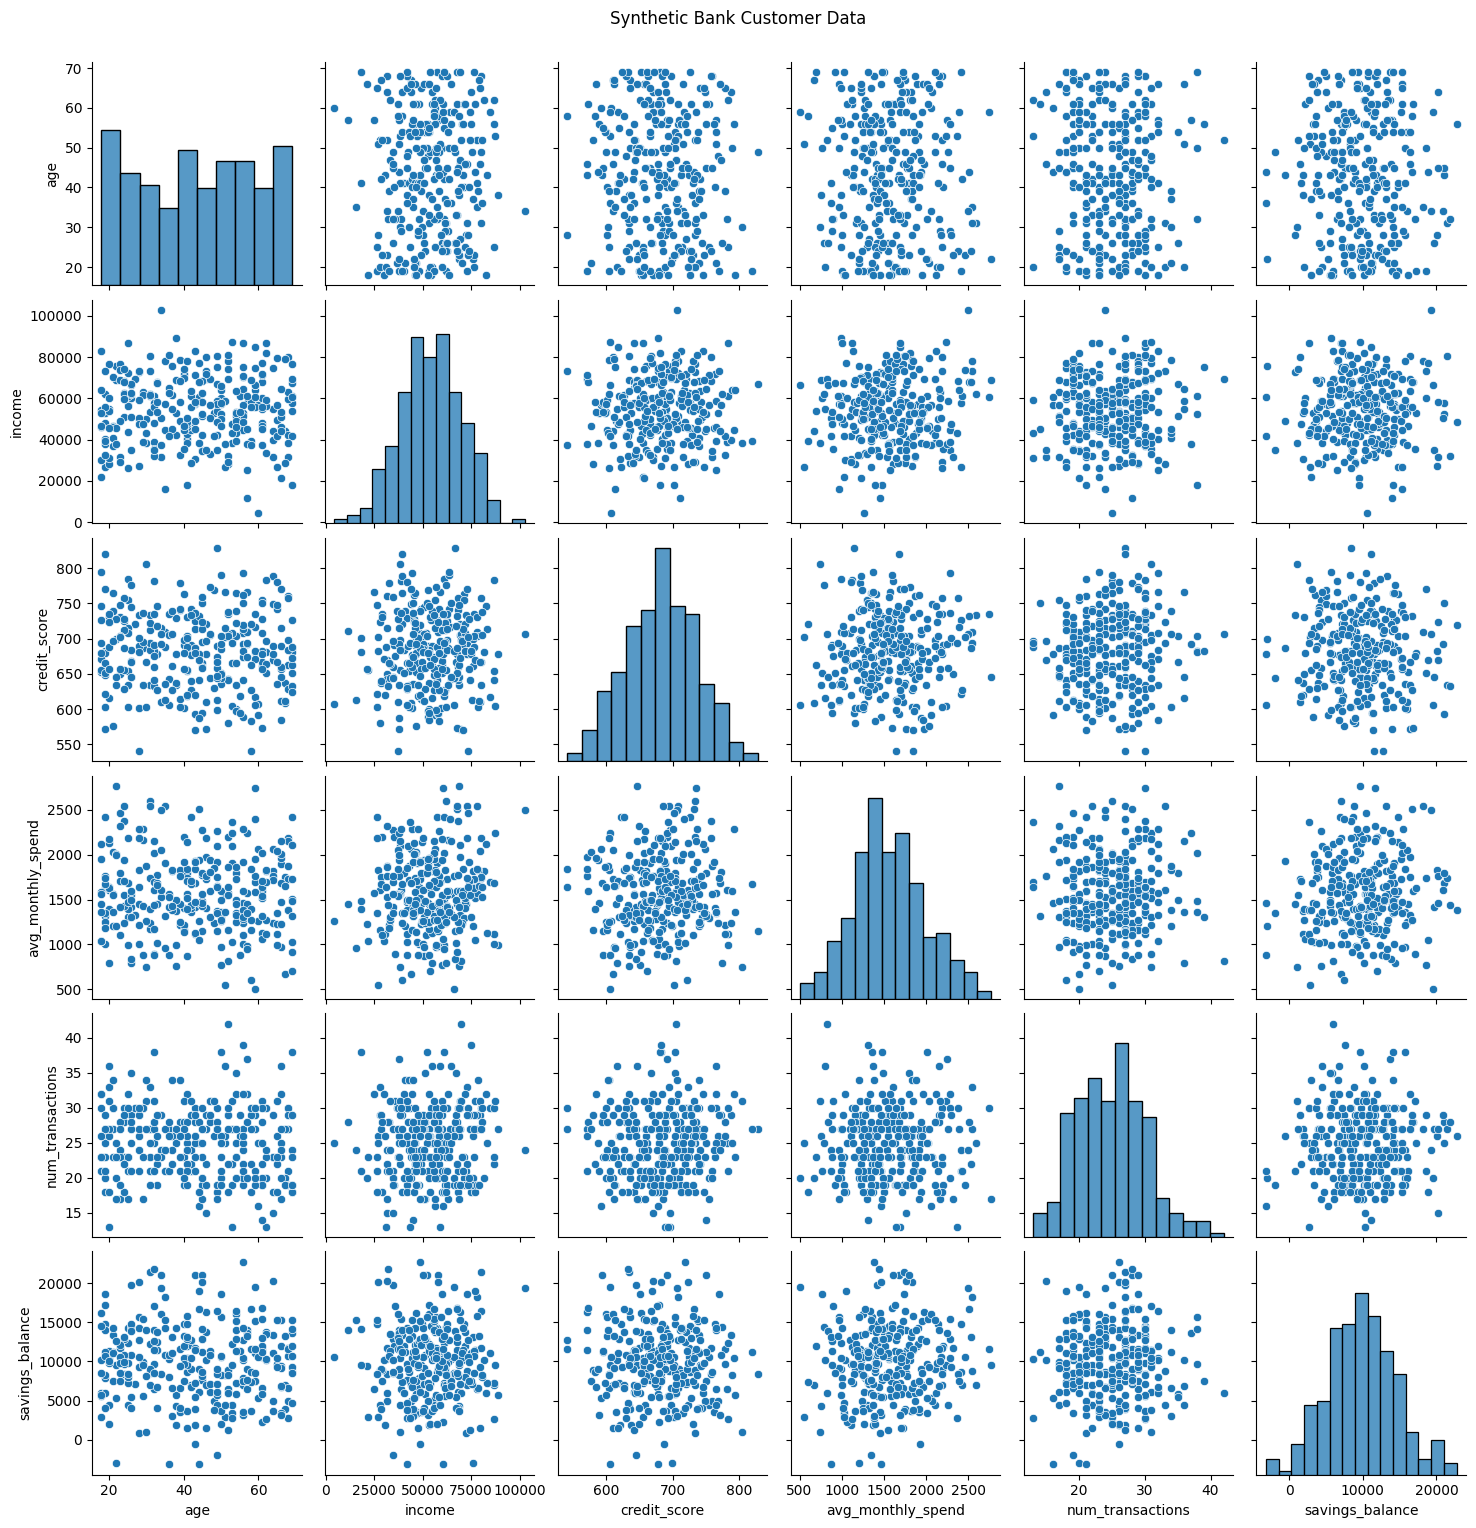

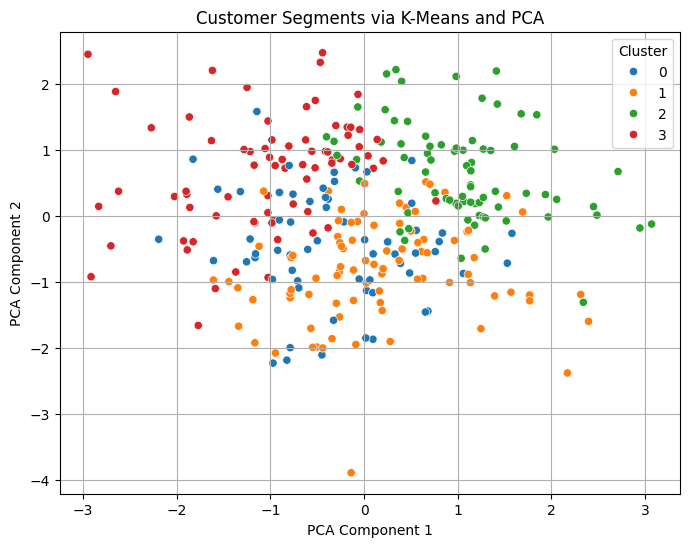


💰 Cluster Centers (approximate customer profiles):
    age   income  credit_score  avg_monthly_spend  num_transactions  \
0  55.1  52848.9         715.9             1733.1              28.9   
1  34.0  52151.3         679.9             1289.5              25.8   
2  57.6  55261.6         657.4             1418.3              21.1   
3  29.5  57348.8         683.4             1904.2              24.8   

   savings_balance  
0           8490.8  
1           6867.2  
2          11129.2  
3          13134.5  


In [1]:
# 💰 K-Means Clustering for Bank Customer Segmentation
# Author: Charles Dorner, EdD (Candidate)
# Sector: Financial Services
# Goal: Cluster synthetic banking customers by behavior

# 📦 Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 🧪 Generate Synthetic Banking Dataset
np.random.seed(42)
n_customers = 300

# Features: age, income, credit_score, avg_monthly_spend, num_transactions, savings_balance
age = np.random.randint(18, 70, n_customers)
income = np.random.normal(55000, 15000, n_customers)
credit_score = np.random.normal(680, 50, n_customers)
monthly_spend = np.random.normal(1500, 400, n_customers)
transactions = np.random.poisson(25, n_customers)
savings = np.random.normal(10000, 5000, n_customers)

# 🧾 Create DataFrame
df = pd.DataFrame({
    'age': age,
    'income': income,
    'credit_score': credit_score,
    'avg_monthly_spend': monthly_spend,
    'num_transactions': transactions,
    'savings_balance': savings
})

# 🔍 Explore the Dataset
print(df.head())
sns.pairplot(df)
plt.suptitle("Synthetic Bank Customer Data", y=1.02)
plt.show()

# 🧼 Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# 🤖 Run K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(X_scaled)
df['cluster'] = clusters

# 🔬 Visualize Clusters with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['cluster'], palette='tab10')
plt.title("Customer Segments via K-Means and PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.legend(title="Cluster")
plt.show()

# 📊 Cluster Centers
centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=df.columns[:-1])
print("\n💰 Cluster Centers (approximate customer profiles):")
print(centers.round(1))
